Lambda School Data Science

*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a `dimensionality reduction and feature extraction method`. Before we dive into convolutions, let's talk about some of the common computer vision applications: 



* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* and *countless* more 

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

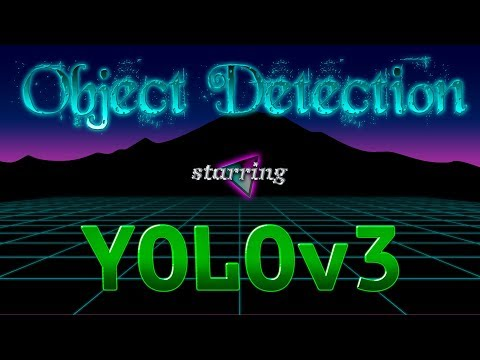

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview
Just like perceptrons and Fully Connected neural networks, CNNs are also inspired by biology - specifically, the receptive fields of the visual cortex.


Put roughly, in a real brain the neurons in the visual cortex **specialize** to be receptive to certain regions, shapes, colors, orientations, and other common visual features. 

In a sense, the very structure of our cognitive system transforms raw visual input, and sends it to neurons that specialize in handling particular subsets of it.

CNNs imitate this approach by applying a convolution. A convolution is an operation on two functions that produces a third function, showing how one function modifies another. Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input.

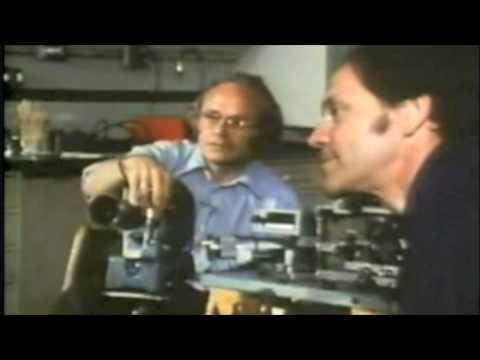

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

## Follow Along

Let's try to do some convolutions and pooling

### Convolution

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

In [3]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
austen_grayscale.shape

(400, 400)

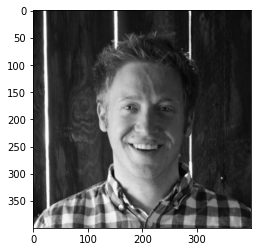

In [4]:
plt.imshow(austen_grayscale, cmap="gray");

In [6]:
import numpy as np
import scipy.ndimage as nd

# this a convolutional filter (i.e. a weight matrix) that perserves the horizontal lines in an image
# during lecture I reasoned outloud how this matrix is actually able to preserve the horizontal lines
# CHALLENGE: try to convince yourself that you understand how these matrices are able to do what they do  
horizontal_edge_convolution = np.array([[1,1,1,1],
                                        [0,0,0,0],
                                        [0,0,0,0],
                                        [-1,-1,-1,-1]])

# this a convolutional filter (i.e. a weight matrix) that perserves the vertical lines in an image 
vertical_edge_convolution = np.array([[1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1]])

# this a convolutional filter (i.e. a weight matrix) that perserves the diagonal lines in an image 
diag_edge_convolution = np.array([[1,0,0,-1],
                                  [0,1,-1,0],
                                  [0,-1,1,0],
                                  [-1,0,0,1]])

# Doc for nd.convolve: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
austen_edges_vert = nd.convolve(austen_grayscale, vertical_edge_convolution)
austen_edges_horz = nd.convolve(austen_grayscale, horizontal_edge_convolution)

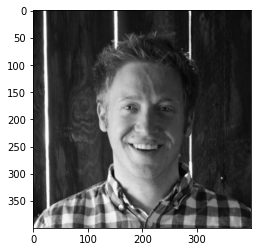

In [8]:
plt.imshow(austen_grayscale, cmap="gray");

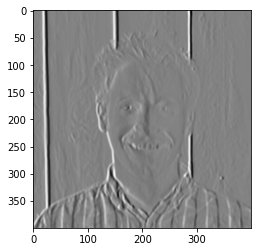

In [7]:
# vertical conv
plt.imshow(austen_edges_vert, cmap="gray");

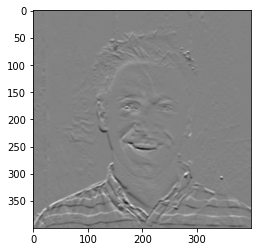

In [9]:
# horz conv
plt.imshow(austen_edges_horz, cmap="gray");

------

### Convolutional Neurons 

Here's the explanation of the convolution calculation that we just did using [**scipy.ndimage.convolve**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).


In that link the calcualtion is given by $C_i = \sum_j{I_{i+k-j} W_j}$, where $C_i$ is the value of the convolution. 

Don't worry about the various indicies (that's not important) what's import is the general structrue of the equation. 

Does it look familar to you? 

No? Let's re-express the sum as a vector product. 

How about now?

$$\mathbf{w} \cdot \mathbf{x}$$

How about now?

$$\mathbf{w} \cdot \mathbf{x} + b$$

How about now?

$$\sigma(\mathbf{w} \cdot \mathbf{x} + b)$$

How about now?

$$y~=~\sigma(\mathbf{w} \cdot \mathbf{x} + b)$$

The convolutional layer is populated with artifical neurons (perceptrons) that specialize in processing visual information - but they are still perceptrons as we can see from the math. 

Now **scipy.ndimage.convolve** doesn't use an activation function or a bias term, but the convolutional layers that we'll be using in our CNNs do have a bias term and (optionally) an activation function. 


Do you see how ubiquitous that perceptron equation is? This is why we took the time to learn it in Sprint 2.

Again, **the perceptron is the fundamental building block of a neural network.**

### Feature Maps 

![](https://www.researchgate.net/profile/Mehdi-Cherti/publication/326412238/figure/fig29/AS:648874402271233@1531715121461/Example-of-feature-hierarchy-learned-by-a-deep-learning-model-on-faces-from-Lee-et-al.png)

The matrix that is created by the convolutions are called **Feature Maps**. 

Feature maps are matrices that contain the output of a convolutional layer. 

These feature maps contain, well, features. 

Each convolutional layer is performing both dimensionality reduction and feature engineering. 

In order to understand the above image, let's focus on the feature engineering part. 

**1st layer's job** is to detect lines/edges from the raw pixel values, then pass those lines (features that were created by the convolutional neurons) to the next layer. 

**2nd layer's job** is to accept the lines and combine them (like lego blocks) to create new features with them, this time parts of an object. Those parts are then passed forward to the next convolutional layer. 

**3rd layer's job** is to accept the parts of an object and put them together (like lego blocks) and create even more complex features, like a person's face, a car, a building, an animal, any object contained in the dataset. 

------

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps. We get smaller and smaller feature set by apply convolutions and then pooling layers. 

Let's take a look very simple example using Austen's pic. 

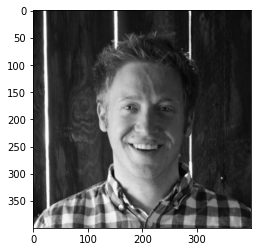

In [10]:
plt.imshow(austen_grayscale, cmap="gray");

In [11]:
austen_grayscale.shape

(400, 400)

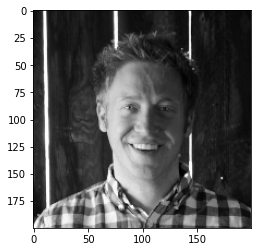

In [16]:
from skimage.measure import block_reduce

# pooling size is a hyper-parm to gridsearch
# too aggressive and image quality drops a lot 
pooling_size = (2,2)
pooling_type = np.max

reduced = block_reduce(austen_grayscale, pooling_size, pooling_type)
plt.imshow(reduced, cmap="gray");

In [13]:
reduced.shape

(200, 200)

In [17]:
# the motivation behind the pooling layer is to reduce the number 
# of trainable weights from potentialy billions down to millions or 100Ks
4000* 2100

8400000

In [ ]:
# by using a MaxPooling of (2,2) we are able to reduce the size of our image by a factor of 2 with out noticably lossing any important information
# we still preserve the light contrast on his face
# we still preserve the lines on his face
# there is a spot on the left side (our left) of his upper mouth that gets a smoothed out a bit 
reduced.shape, austen_grayscale.shape

## Challenge

You will be expected to be able to describe convolution. 

---------

# CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



------
# Build a CNN

In [18]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

### First let's load and explore the data

In [19]:
# load in our color images
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [20]:
# 4D data object ?!?!?!?!?!?!
train_images.shape

(50000, 32, 32, 3)

In [22]:
# before normalization
train_images.max()

255

In [23]:
# Normalize pixel values between 0 and 1
# this is done by dividing by the max pixel value 
max_pixel_val = train_images.max()
train_images = train_images/max_pixel_val
test_images = test_images/max_pixel_val

In [26]:
# unit test to make sure that max pixel value has been rescaled (normalized) to 1 
assert train_images.max() == 1.0

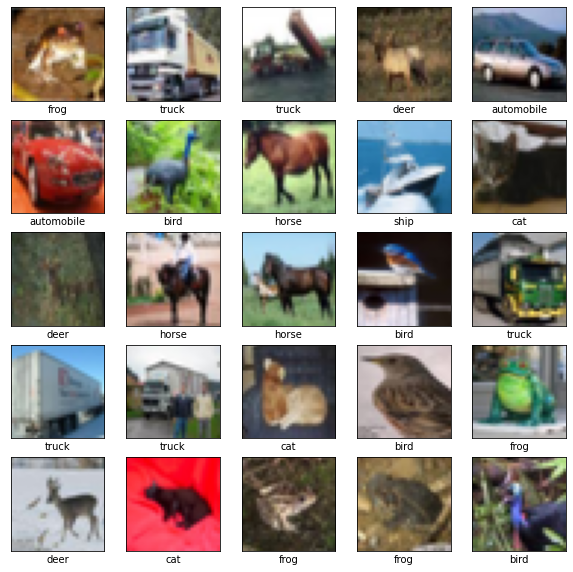

In [27]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Tensors

![](https://miro.medium.com/max/891/0*jGB1CGQ9HdeUwlgB)


In [28]:
# rank 4 tensor dun, dun, dun!!!!!
train_images.shape

(50000, 32, 32, 3)

In [29]:
# this is a Rank 3 tensor 
# another way of thinking about this array is that it is 3-dim
train_images[0].shape

(32, 32, 3)

_____

### Build a CNN Model

In [30]:
n_weight_matrices = 32
weight_matrix_size = (3,3)
act_func = "relu"
image_dim = (32, 32, 3) # dim of single sample, simgle color image
pool_size = (2,2)

In [34]:
# build model layer by layer

# instantate sequential class
model = Sequential()

# add 1st conv layer
model.add(Conv2D(n_weight_matrices, # n weight matrices = n of feature maps outputed
                 weight_matrix_size, # size of weight matrices 
                 activation=act_func, # convolution values are passed into this activation function (optional)
                 input_shape = image_dim)) # dim of input data (at the sample level)

# add 1st pooling layer 
model.add(MaxPooling2D(pool_size))

# add 2nd conv layer
model.add(Conv2D(64, weight_matrix_size, activation=act_func))

# add 2nd pooling layer
model.add(MaxPooling2D(pool_size))

# add 3rd conv layer 
model.add(Conv2D(62, # 62 weight matrices will create 62 feat maps, 1 feat map per weight matrix 
                 weight_matrix_size, 
                 activation=act_func))

# flatten 2D images into 1D row vectors 
model.add(Flatten())

# add hidden dense layer 
model.add(Dense(64, activation=act_func))

# add dense output layer 
model.add(Dense(10, activation="softmax"))

# print summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 62)          35774     
_________________________________________________________________
flatten_1 (Flatten)          (None, 992)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [36]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Fit Model
model.fit(train_images, 
          train_labels, 
          epochs=10, 
          validation_data=(test_images, test_labels), 
          workers=10
          )

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7380 - accuracy: 0.3591 - val_loss: 1.2593 - val_accuracy: 0.5502
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1908 - accuracy: 0.5782 - val_loss: 1.1018 - val_accuracy: 0.6094
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0209 - accuracy: 0.6399 - val_loss: 1.0140 - val_accuracy: 0.6412
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9025 - accuracy: 0.6778 - val_loss: 0.9704 - val_accuracy: 0.6671
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8350 - accuracy: 0.7057 - val_loss: 0.8929 - val_accuracy: 0.6950
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7600 - accuracy: 0.7314 - val_loss: 0.8909 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7172 - accuracy: 0.7475 - val_loss: 0.9067 -

In [38]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.8957 - accuracy: 0.7020


## Challenge

You will apply CNNs to a classification task in the module project.

-------
### Digression

We do have the option of taking a look at the weight values (from the convolutional layers and FCFF layers). The input data (the images) are normalized to values between 0 and 1. Our lesson on Gradient Descent (from Sprint 2) taught us that normalized data should have 2 observable effects: 

- The weight values should all be about the same size (i.e. on the same order of magnitude). 
- The model performance should be better when using normlized data than on non-normalized data set. 

A fun experiment you should consider runing at some other time would be to see if these observations are reversed and to what extent if the input data is not normalized. 

In [39]:
weights = model.get_weights()
for w_mat in weights:
    print (w_mat.min(), w_mat.max())

-0.38576064 0.34025574
-0.32246542 0.17650682
-0.774921 0.6815818
-0.16257794 0.30844367
-0.7837935 0.6216074
-0.17160808 0.33491594
-0.65053403 0.6230686
-0.11829163 0.35422525
-0.7098132 0.6252522
-0.14452468 0.2378364


-------

# Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### TensorFlow Hub

"A library for reusable machine learning modules"

This lets you quickly take advantage of a model that was trained with thousands of GPU hours. 

It also enables **transfer learning** - reusing a part of a trained model (called a module) that includes weights and assets, but also training the overall model some yourself with your own data. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better.

https://www.tensorflow.org/hub/

TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. 

We'll focus on an image classifier: **ResNet50.**

Here's a link that lists all the pre-trained models in the [**Keras Library**](https://keras.io/api/applications/)

## Follow Along

In [40]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [45]:
def process_img_path(img_path):
    """
    Using tensorflow per-build image processor. 

    Returns processed image. 
    """
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # instantiate model
    model = ResNet50(weights='imagenet')
    
    # get classification of image
    features = model.predict(x)
    
    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=5)[0]
    print(results)
    
    for entry in results:
        if entry[1] == 'banana':
            return entry[2]
        return 0.0

In [46]:
import requests

# links to two images that we'll use with our pre-trained model
image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

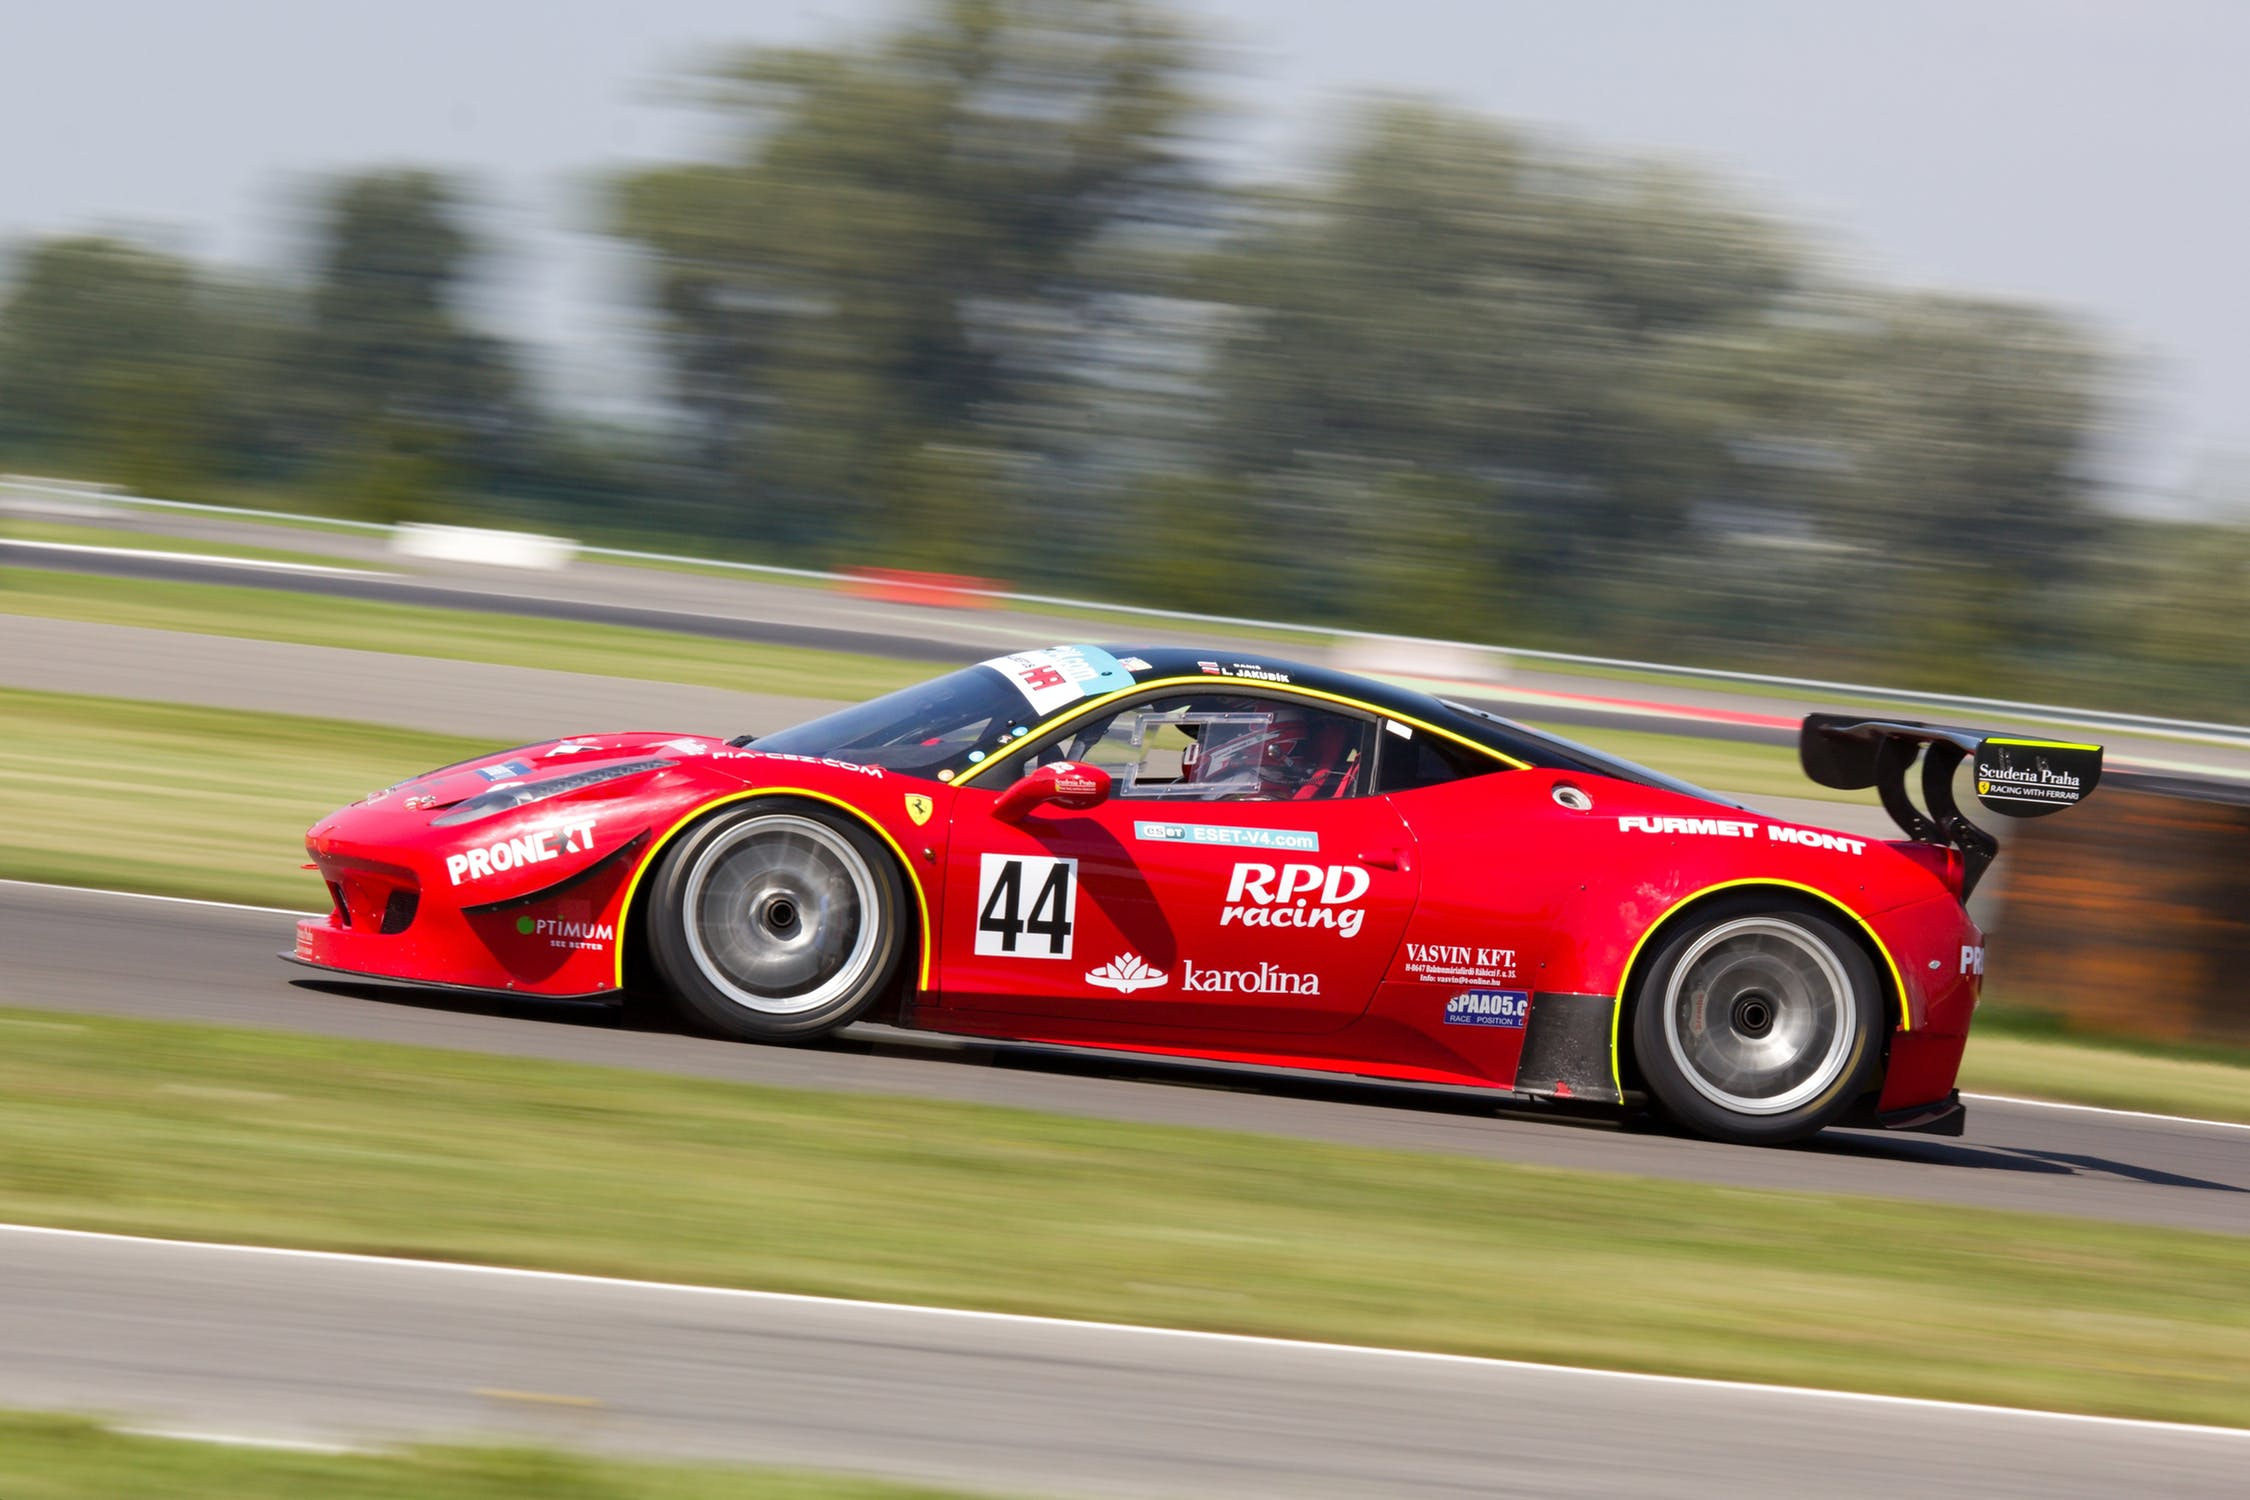

In [47]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [48]:
processed_imaged = process_img_path('example0.jpg')

img_contains_banana(processed_imaged)

[('n04037443', 'racer', 0.9256286), ('n04285008', 'sports_car', 0.07028751), ('n04461696', 'tow_truck', 0.0021220413), ('n02974003', 'car_wheel', 0.001467153), ('n03100240', 'convertible', 0.00029069127)]


0.0

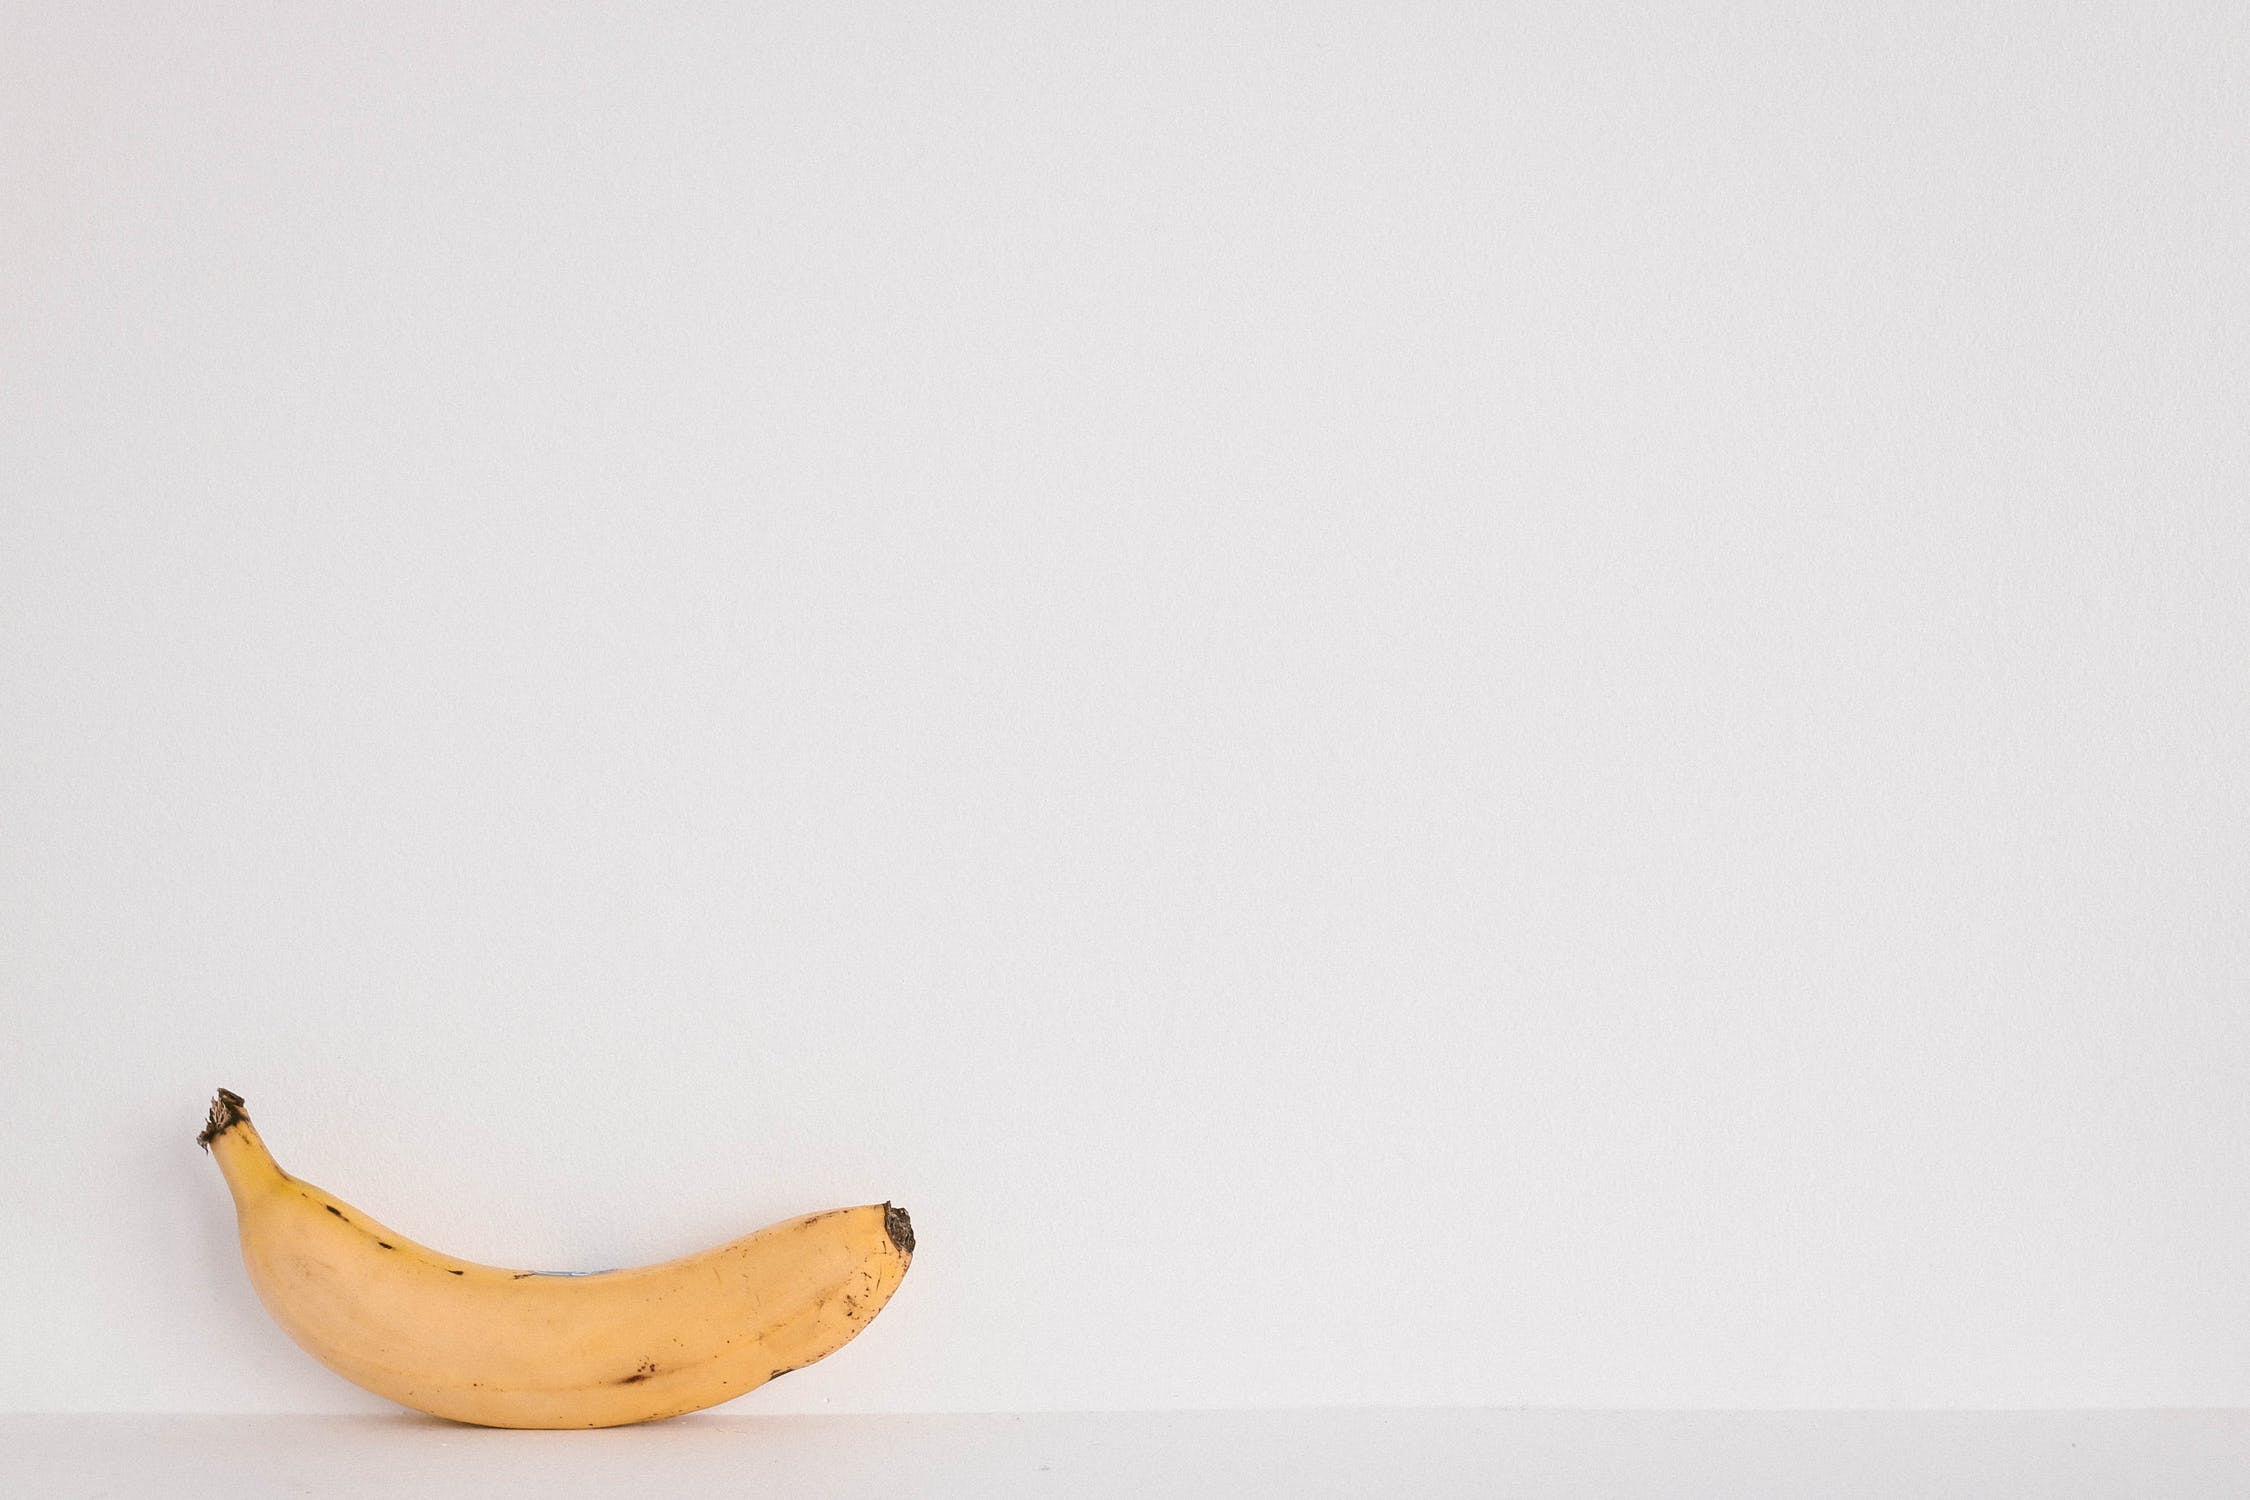

In [49]:
Image(filename='example1.jpg', width=600)

In [50]:
img_contains_banana(process_img_path('example1.jpg'))

[('n03532672', 'hook', 0.077739336), ('n07753592', 'banana', 0.07015067), ('n03498962', 'hatchet', 0.063320726), ('n03598930', 'jigsaw_puzzle', 0.050685477), ('n04228054', 'ski', 0.016942821)]


0.0

Notice that, while it gets it right, the confidence for the banana image is fairly low. That's because so much of the image is "not-banana"! How can this be improved? Bounding boxes to center on items of interest.

## Challenge

You will be expected to apply a pretrained model to a classificaiton problem today. 

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)

------
# Referenced used duirng lecutre 

[Image of Tensors](https://miro.medium.com/max/891/0*jGB1CGQ9HdeUwlgB), we learned that vectors and Matricies are special cases of a more general data structure called a Tensor. 

[CNN Feature Engineering](https://qjjnh3a9hpo1nukrg1fwoh71-wpengine.netdna-ssl.com/wp-content/uploads/2019/07/1_ZD3ewOfpfsMAjhp4MYFnog-edited.jpg), we learned that each convolutional layer is creating features from the images that are passed into it. This image shows how a CNN learns edges, object parts, and then the entire object as learned features from previous convolutional layers are passed to sunsequent convolutional layers. 

[Stanford University CNN class](https://cs231n.github.io/convolutional-networks/), in lecture I refered the annimation at about half way down the page that shows how the filter matrices (i.e. the weight matrices) are overlapped over the Red, Yellow, and Blue channels of a color image in order to calculate convolutions and how the results are stored in an output volume. 

[Py Image Search](https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#:~:text=increase%20when%20necessary.-,kernel_size,(7%2C%207)%20tuples.&text=%2C%20a%202%2Dtuple%20specifying%20the,of%20the%202D%20convolution%20window.), this link provdies an in-depth exploration of each of the Conv2D parameters and how to select specific values for each parameter. 

[Keras Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) and of course don't forget about the documention for the python package that we are using to build our models!